#### **6-3. Multiple Regression (다항 회귀)**

In [14]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes=load_diabetes()
x=pd.DataFrame (diabetes.data, columns=diabetes.feature_names)
y=diabetes.target
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [18]:
from sklearn.linear_model import Ridge
import numpy as np

alpha = np.logspace(-3,1,5)

data=[]
for i, a in enumerate(alpha):
    ridge=Ridge(alpha=a, random_state=45)
    ridge.fit(x,y)
    data.append(pd.Series(np.hstack([ridge.coef_])))

df_ridge = pd.DataFrame (data,index=alpha)
df_ridge.columns = x.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.549162,-239.086958,520.369375,323.822745,-712.322159,413.379125,65.811323,167.513007,720.939924,68.123360
0.010,-7.197534,-234.549764,520.588601,320.517131,-380.607135,150.484671,-78.589275,130.312521,592.347959,71.134844
0.100,1.308705,-207.192418,489.695171,301.764058,-83.466034,-70.826832,-188.678898,115.712136,443.812917,86.749315
1.000,29.466112,-83.154276,306.352680,201.627734,5.909614,-29.515495,-152.040280,117.311732,262.944290,111.878956
10.000,19.812842,-0.918430,75.416214,55.025160,19.924621,13.948715,-47.553816,48.259433,70.143948,44.213892


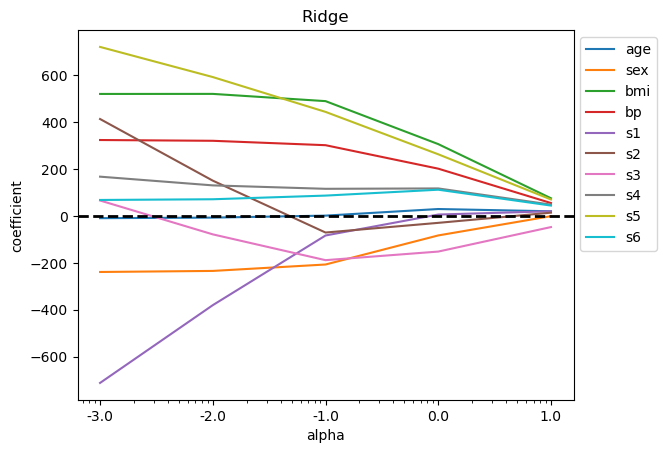

In [21]:
import matplotlib.pyplot as plt

plt.semilogx(df_ridge)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1,1))
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('coefficient')
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)


In [22]:
from sklearn.linear_model import Lasso

alpha = np.logspace(-3,1,5)

data=[]
for i, a in enumerate(alpha):
    lasso=Lasso(alpha=a, random_state=45)
    lasso.fit(x,y)
    data.append(pd.Series(np.hstack([lasso.coef_])))

df_lasso = pd.DataFrame (data,index=alpha)
df_lasso.columns = x.columns
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.996177,-238.896328,520.267403,323.423596,-720.244828,421.399753,66.733503,164.448022,725.335558,67.476810
0.010,-1.304662,-228.819129,525.566130,316.168834,-307.016211,89.324647,-105.078369,119.597616,571.330356,65.008383
0.100,-0.000000,-155.359976,517.186795,275.077235,-52.539365,-0.000000,-210.157991,0.000000,483.912648,33.673965
1.000,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.000000,307.605418,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


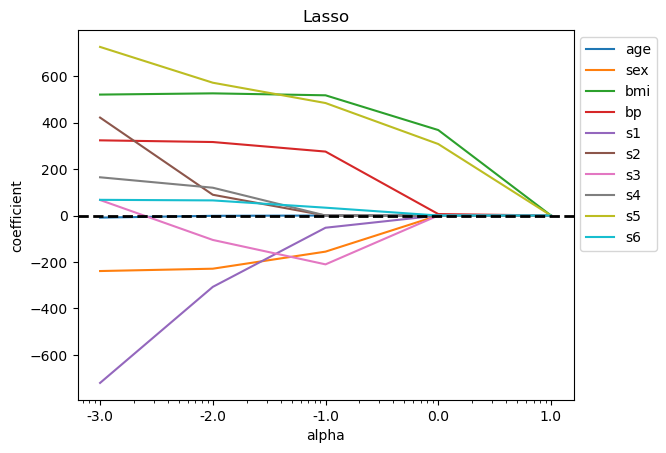

In [23]:
import matplotlib.pyplot as plt

plt.semilogx(df_lasso)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_lasso.columns, bbox_to_anchor=(1,1))
plt.title('Lasso')
plt.xlabel('alpha')
plt.ylabel('coefficient')
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)

In [27]:
from sklearn.linear_model import ElasticNet

alpha = np.logspace(-3,1,5)

data=[]
for i, a in enumerate(alpha):
    ela=ElasticNet(alpha=a, l1_ratio=0.5, random_state=45)
    ela.fit(x,y)
    data.append(pd.Series(np.hstack([ela.coef_])))

df_ela = pd.DataFrame (data,index=alpha)
df_ela.columns = x.columns
df_ela

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.706329,-178.074465,450.884335,281.068431,-44.049705,-77.943898,-188.957481,119.794399,393.702359,98.944302
0.010,33.147367,-35.245354,211.024367,144.559236,21.931722,0.000000,-115.619973,100.658917,185.325911,96.257335
0.100,10.286332,0.285983,37.464655,27.544765,11.108856,8.355892,-24.120809,25.505492,35.465700,22.894985
1.000,0.359018,0.000000,3.259767,2.204340,0.528646,0.250935,-1.861363,2.114454,3.105835,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


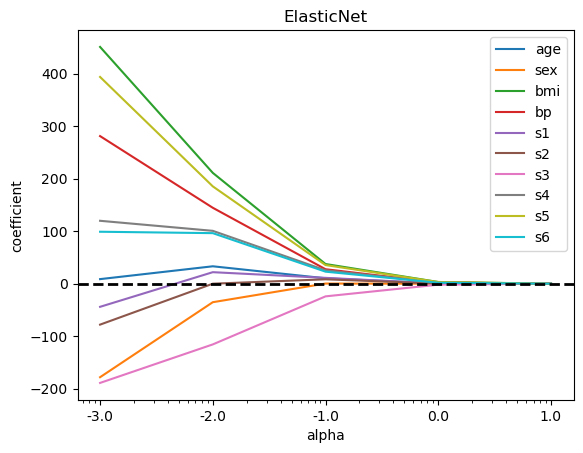

In [28]:
import matplotlib.pyplot as plt

plt.semilogx(df_ela)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ela.columns, bbox_to_anchor=(1,1))
plt.title('ElasticNet')
plt.xlabel('alpha')
plt.ylabel('coefficient')
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Linear Regression 모델 생성
lr_model = LinearRegression()

# Linear Regression 모델의 파라미터 출력
print("Linear Regression Parameters:")
for param, value in lr_model.get_params().items():
    print(f"{param}: {value}")

# Logistic Regression 모델 생성
log_model = LogisticRegression()

# Logistic Regression 모델의 파라미터 출력
print("\nLogistic Regression Parameters:")
for param, value in log_model.get_params().items():
    print(f"{param}: {value}")

Linear Regression Parameters:
copy_X: True
fit_intercept: True
n_jobs: None
positive: False

Logistic Regression Parameters:
C: 1.0
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 100
multi_class: deprecated
n_jobs: None
penalty: l2
random_state: None
solver: lbfgs
tol: 0.0001
verbose: 0
warm_start: False


#### **6-4-1. Logistic Regression**

In [30]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

body=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/bodyPerformance.csv')
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [31]:
body['gender']=np.where(body['gender']=='M',0,1)
body['class_1']=np.where(body['class']=='A',1,0)
body


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [45]:
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class','class_1']))
x = body[feature_columns]
y = body['class_1']

x_train, x_test, y_train, y_test = \
train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [47]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(random_state=45)
logR.fit(x_train,y_train)

LogisticRegression(random_state=45)

In [52]:
proba = pd.DataFrame (logR.predict_proba(x_train))
cs = logR.decision_function(x_train)

df = pd.concat ([proba, pd.DataFrame(cs)], axis=1)
df.columns =['Not A', 'A', 'decision_function']

df.sort_values(['decision_function'], inplace=True)
df.reset_index(inplace=True, drop=True)

df

,Not A,A,decision_function
0,1.000000,1.489416e-08,-18.022297
1,1.000000,6.883399e-08,-16.491568
2,1.000000,8.173282e-08,-16.319810
3,1.000000,9.502096e-08,-16.169168
4,1.000000,1.245541e-07,-15.898525
...,...,...,...
9370,0.001972,9.980282e-01,6.226835
9371,0.001703,9.982969e-01,6.373603
9372,0.001583,9.984173e-01,6.447011
9373,0.000756,9.992441e-01,7.186882


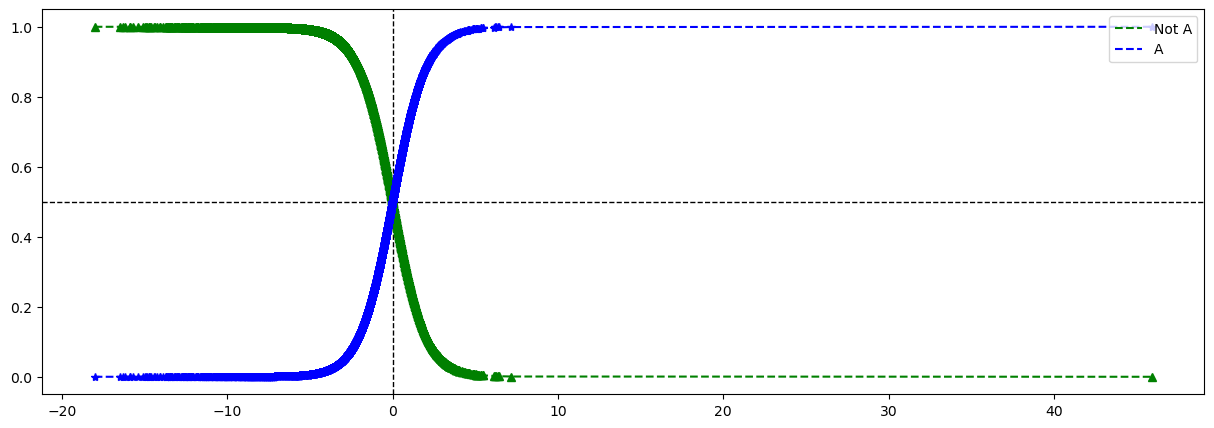

In [56]:
plt.figure(figsize=(15,5))

plt.axhline(y=0.5, linestyle='--',color='black', linewidth=1)
plt.axvline(x=0, linestyle='--',color='black', linewidth=1)

plt.plot(df['decision_function'], df['Not A'], 'g--', label='Not A')
plt.plot(df['decision_function'], df['Not A'], 'g^')
plt.plot(df['decision_function'], df['A'], 'b--', label='A')
plt.plot(df['decision_function'], df['A'], 'b*')

plt.legend(loc='upper right')
plt.show()

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = logR.predict(x_test)

print(confusion_matrix (y_test, pred))
print('정확도: %.2f%%' %(accuracy_score (y_test, pred)*100))
print('정밀도: %.2f%%' %(precision_score (y_test, pred)*100))
print('재현율: %.2f%%' %(recall_score (y_test, pred)*100))
print('F1: %.2f%%' %(f1_score (y_test, pred)*100))

[[2759  255]
 [ 347  657]]
정확도: 85.02%
정밀도: 72.04%
재현율: 65.44%
F1: 68.58%


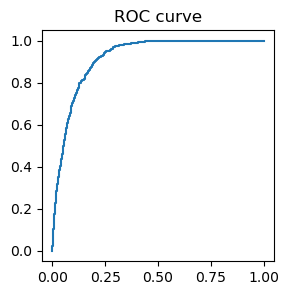

auc= 0.9


In [64]:
# ROC curve 첫 번째 방법 (Linear Regression 예시 활용)
from sklearn.metrics import roc_curve, auc
pred_roc = logR.predict_proba(x_test)[:, 1]
  #Linear 회귀와 다르게 logistic 회귀이므로, 위와 같이 pred에 0 or 1 결과가 아닌 확률 값을 전달해야 함!

fpr, tpr, thres = roc_curve(y_test, pred_roc, pos_label=1)

import matplotlib.pyplot as plt
fig, axe = plt.subplots(figsize=(3,3))
axe.plot(fpr,tpr)
axe.set_title('ROC curve')
plt.show()

print('auc= %.1f' %auc(fpr,tpr))

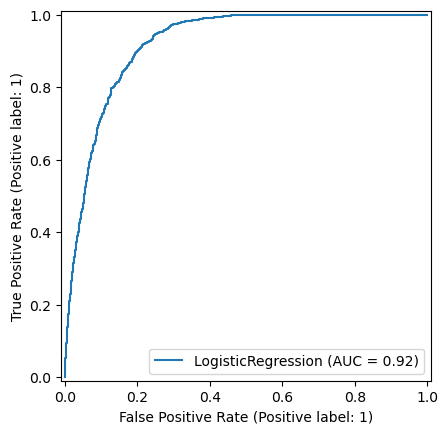

In [62]:
# ROC curve 두 번째 방법
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator (logR, x_test, y_test)
plt.show()

#### **6-4-2. 다중 클래스 분류 (softmax) 적용 (동일 예제)**

In [67]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

body=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/bodyPerformance.csv')

body['gender']=np.where(body['gender']=='M',0,1)
mapping = {'A':0,'B':1,'C':2,'D':3}
body['class_2']=body['class'].map(mapping)

body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_2
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3


In [68]:
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class','class_2']))
x = body[feature_columns]
y = body['class_2']

x_train, x_test, y_train, y_test = \
train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [69]:
from sklearn.linear_model import LogisticRegression
softm = LogisticRegression(random_state=45, multi_class='multinomial', solver='lbfgs', C=10)
softm.fit(x_train,y_train)

LogisticRegression(C=10, multi_class='multinomial', random_state=45)

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred = softm.predict(x_test)

print(confusion_matrix (y_test, pred))
print('정확도: %.2f%%' %(accuracy_score (y_test, pred)*100))

[[707 261  36   0]
 [269 403 299  33]
 [ 92 207 525 181]
 [ 13  63 157 772]]
정확도: 59.91%


In [76]:
softm.predict([x_test.iloc[-1,:]])
softm.predict_proba([x_test.iloc[-1,:]])

array([[0.6264028 , 0.31189655, 0.0601562 , 0.00154446]])